In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import peakdetect as pdet

%matplotlib inline
from scipy.fftpack import rfft, fft

## Function Findpitch

#### - Fundamental frequency
#### - All songs in folder

In [2]:
def findpitch(path):
    files = librosa.util.find_files(path,recurse=False,case_sensitive=True)
    results = []
    for index,i in enumerate(range(len(files))) : 
        if i <= len(files):
            song, sr = librosa.load(files[i])
            n_fft = len(song[0:sr])
            song_fft = scipy.fft(song, n=n_fft)
            song_fft = np.abs(song_fft)
            song_mag_dB = 20*np.log10(song_fft)
            f = np.linspace(0, sr, len(song_fft)) #frequency variable
    
            #FindPeaks
            [maxtab, mintab] = pdet.peakdet(song_mag_dB,80)
            peak = maxtab[:,-2] 
    
            plt.figure(figsize=(15,10))
            plt.subplot(3,1,1)
            plt.plot(f[:1500],song_fft[:1500]) # magnitude spectrum
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.grid()
    
            plt.subplot(3,1,2)
            plt.plot(song_mag_dB[0:1500])
            plt.scatter(maxtab[:,0], maxtab[:,1], color='red')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Signal magnitude(dB)')
            plt.grid()
            plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
            results.append(peak)
            print ("Peak {}: {}".format(i, peak[0]))
            #print (index,peak) 
        else :
            print ("Ending")
    return results


## Function FindPeak_FFT

#### - Fundamental frequency
#### - One song

In [2]:
def findpeak_FFT(file):
    
    song, sr = librosa.load(file)
    n_fft = len(song[0:sr])
    song_fft = scipy.fft(song, n=n_fft)
    song_fft = np.abs(song_fft)
    song_mag_dB = 20*np.log10(song_fft)
    f = np.linspace(0, sr, len(song_fft)) #frequency variable
    
    #FindPeaks
    [maxtab, mintab] = pdet.peakdet(song_mag_dB,80)
    
    #Plot
    plt.figure(figsize=(15,10))
    plt.subplot(3,1,1)
    librosa.display.waveplot(song, sr=sr)
    plt.ylabel('Amplitude')
    plt.title('%s'%(file))
    
    plt.subplot(3,1,2)
    plt.plot(f[:1500],song_fft[:1500]) # magnitude spectrum
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.title('%s'%(file))
    
    plt.subplot(3,1,3)
    plt.plot(song_mag_dB[0:1500])
    plt.scatter(maxtab[:,0], maxtab[:,1], color='red')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Signal magnitude(dB)')
    plt.grid()
    plt.title('%s'%(file))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    

    print('Detect Fundamental Frequency FFT.')
    print('Peak are: %f ' % (maxtab[:,-2]))
    print('Magnitude are: %.3f' % (maxtab[:,-1]))
    print('Sampling Rate : %s' % sr)
    
    return maxtab[:,-2] , maxtab[:,-1]

## Use findpeak_FFT

Detect Fundamental Frequency FFT.
Peak are: 146.000000 
Magnitude are: 44.069
Sampling Rate : 22050


(array([146.]), array([44.06943471]))

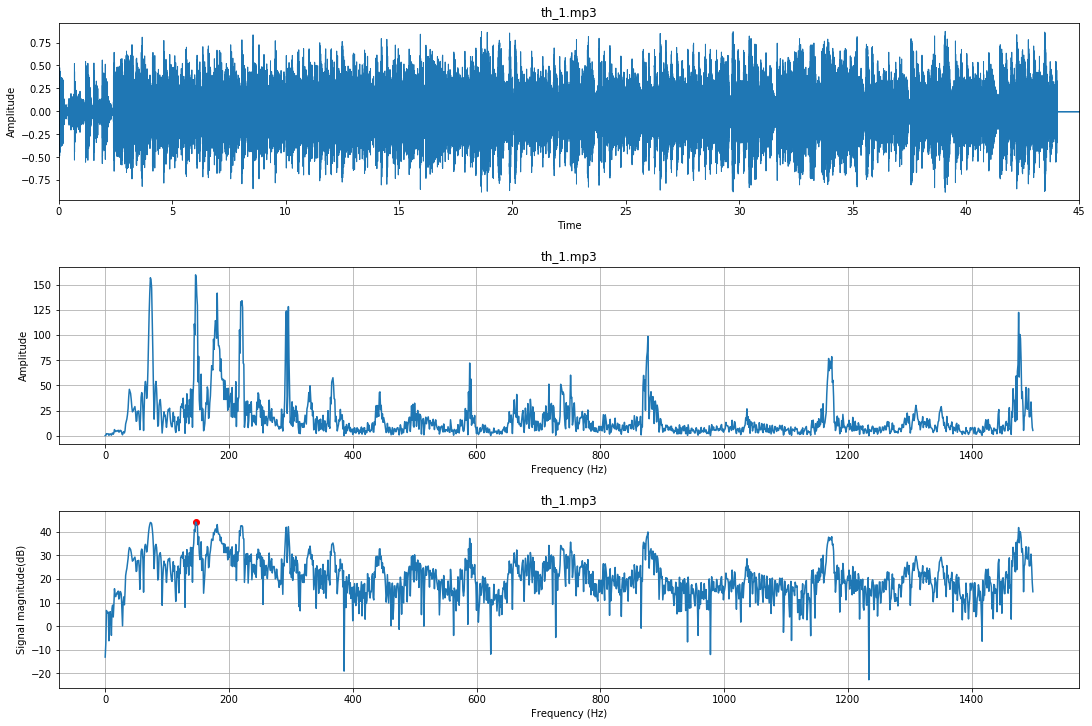

In [4]:
findpeak_FFT('th_1.mp3')